In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess

In [65]:
def get_data(x, v, w, dt, time, type):
    par = open('config1.txt', 'w')
    print(x,      file=par)
    print(v,      file=par)
    print(w,      file=par)
    print(dt,     file=par)
    print(time,   file=par)
    print(type,   file=par)
    par.close()
    returned_output = subprocess.check_output('./wk7')
    print(returned_output.decode('utf-8'))
    return pd.DataFrame(np.fromfile('data1.binary', dtype=np.dtype([
                ('x', np.float64),
                ('v', np.float64),
                ('w', np.float64)
            ])))


In [66]:
def get_data_loss(x, v, w, dt, time, type, g):
    par = open('config2.txt', 'w')
    print(x,      file=par)
    print(v,      file=par)
    print(w,      file=par)
    print(dt,     file=par)
    print(time,   file=par)
    print(type,   file=par)
    print(g,      file=par)
    par.close()
    returned_output = subprocess.check_output('./wk7')
    print(returned_output.decode('utf-8'))
    return pd.DataFrame(np.fromfile('data2.binary', dtype=np.dtype([
                ('x', np.float64),
                ('v', np.float64),
                ('w', np.float64)
            ])))

In [67]:
data_l = get_data_loss(3 * np.pi/4, 0, 1, 0.01, 70, "Euler", 2)
print(data_l)

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary

                 x             v             w
0     2.356194e+00  0.000000e+00  1.000000e+00
1     2.000000e+00  2.356194e+00 -2.356194e-02
2     1.000000e+00  2.000000e+00  2.355959e+00
3    -4.665265e-02  1.000000e+00  2.000000e+00
4     2.355492e+00 -6.927919e-02  1.000000e+00
...            ...           ...           ...
9331 -4.749432e-29  1.000000e+00  2.000000e+00
9332  4.769127e-29 -4.702610e-29  1.000000e+00
9333  2.000000e+00  4.722101e-29 -4.656249e-29
9334  1.000000e+00  2.000000e+00  4.675539e-29
9335 -4.610345e-29  1.000000e+00  2.000000e+00

[9336 rows x 3 columns]


In [68]:
def get_data_F(x, v, w, dt, time, type, g, time_s, dt_s, w0):
    par = open('config3.txt', 'w')
    print(x,      file=par)
    print(v,      file=par)
    print(w,      file=par)
    print(dt,     file=par)
    print(time,   file=par)
    print(type,   file=par)
    print(g,      file=par)
    print(time_s, file=par)
    print(dt_s,   file=par)
    print(w0,     file=par)
    par.close()
    returned_output = subprocess.check_output('./wk7')
    print(returned_output.decode('utf-8'))
    return pd.DataFrame(np.fromfile('data3.binary', dtype=np.dtype([
                ('x', np.float64),
                ('v', np.float64),
                ('w', np.float64)
            ])))

In [69]:
data_F = get_data_F(3 * np.pi/4, 0, 1, 0.01, 70, "Euler", 2, 0, 0.01, 9)
print(data_F)

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary

                  x     v             w
0      2.356194e+00  0.00  1.000000e+00
1      2.000000e+00  0.00  1.000000e-02
2      1.000000e+00  9.00  2.356194e+00
3     -1.356194e-02  1.00  2.000000e+00
4      0.000000e+00  0.01  1.000000e+00
...             ...   ...           ...
18667 -4.246280e-15  1.00  2.000000e+00
18668  0.000000e+00  0.01  1.000000e+00
18669  9.000000e+00  1.00 -4.246280e-15
18670  1.000000e+00  2.00  0.000000e+00
18671  1.000000e-02  1.00  9.000000e+00

[18672 rows x 3 columns]


# Euler

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary



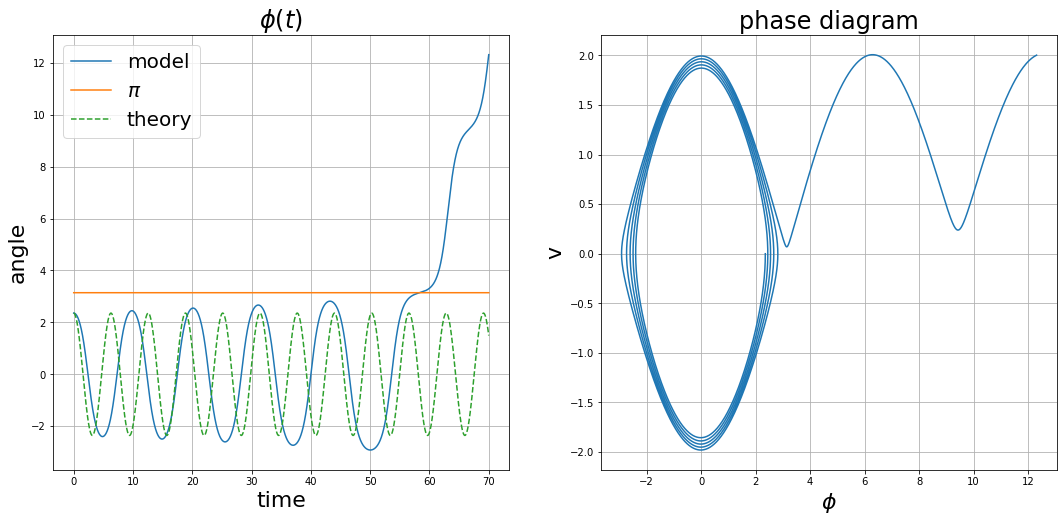

In [70]:
data = get_data(3 * np.pi/4, 0, 1, 0.01, 70, "Euler")

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18,8)

t = np.linspace(0, 70, len(data.x))
ax[0].plot(t, data.x, label = 'model')
ax[0].plot(t, np.pi+t-t, label='$\pi$')
ax[0].plot(t, 3 * np.pi/4 * np.cos(t),'--', label='theory')

#ax.plot(t, 3 * np.pi / 4 * np.cos(t), '--')

ax[0].legend(loc='best', fontsize=20)
ax[0].set_xlabel('time', fontsize=22)
ax[0].set_ylabel('angle', fontsize=22)
ax[0].set_title('$\phi(t)$', fontsize=24)
ax[0].grid(True)
ax[1].plot(data.x, data.v)
ax[1].set_xlabel('$\phi$', fontsize=22)
ax[1].set_ylabel('v', fontsize=22)
ax[1].set_title('phase diagram', fontsize=24)
ax[1].grid(True)
plt.show()

# Heun

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary



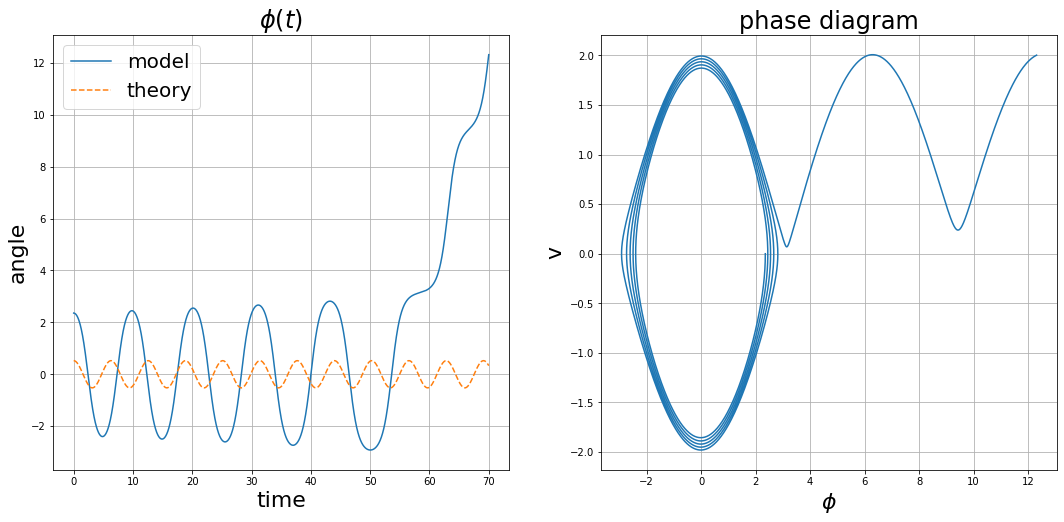

In [77]:
data1 = get_data(np.pi/6, 0, 1, 0.01, 70, "Heun")

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18,8)

t = np.linspace(0, 70, len(data1.x))
ax[0].plot(t, data1.x, label = 'model')
ax[0].plot(t, np.pi/6*np.cos(t),'--', label='theory')
ax[0].legend(loc='best', fontsize=20)
ax[0].set_xlabel('time', fontsize=22)
ax[0].set_ylabel('angle', fontsize=22)
ax[0].set_title('$\phi(t)$', fontsize=24)
ax[0].grid(True)

data2 = get_data(np.pi/6, 0, 1, 0.01, 70000, "Heun")

ax[1].plot(data2.x, data2.v)
ax[1].set_xlabel('$\phi$', fontsize=22)
ax[1].set_ylabel('v', fontsize=22)
ax[1].set_title('phase diagram', fontsize=24)
ax[1].grid(True)
plt.show()

# Runge-Kut 45

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary



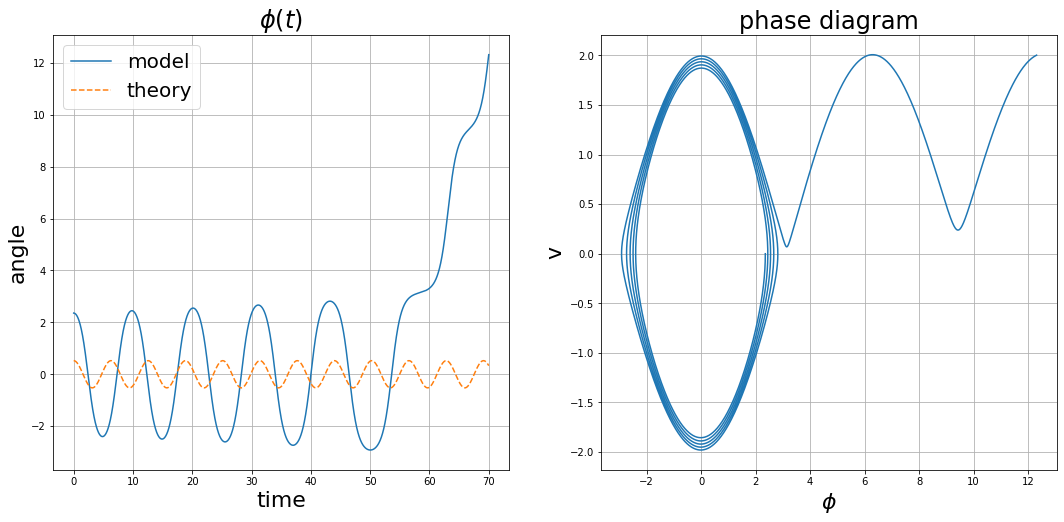

In [72]:
data1 = get_data(np.pi/6, 0, 1, 0.01, 70, "Rg45")

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(18,8)

t = np.linspace(0, 70, len(data1.x))
ax[0].plot(t, data1.x, label = 'model')
ax[0].plot(t, np.pi/6*np.cos(t),'--', label='theory')
ax[0].legend(loc='best', fontsize=20)
ax[0].set_xlabel('time', fontsize=22)
ax[0].set_ylabel('angle', fontsize=22)
ax[0].set_title('$\phi(t)$', fontsize=24)
ax[0].grid(True)

data2 = get_data(np.pi/6, 0, 1, 0.01, 70000, "Heun")

ax[1].plot(data2.x, data2.v)
ax[1].set_xlabel('$\phi$', fontsize=22)
ax[1].set_ylabel('v', fontsize=22)
ax[1].set_title('phase diagram', fontsize=24)
ax[1].grid(True)
plt.show()

# Отклонение от модели при разных начальных углах

data was written to data1.binary
data was written to data2.binary
data was written to data3.binary



ValueError: operands could not be broadcast together with shapes (7002,) (2001,) 

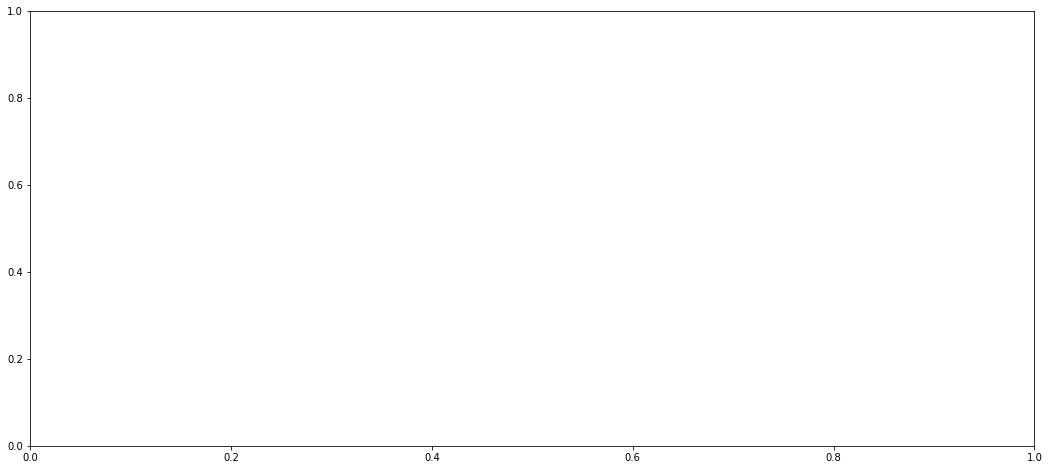

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(18,8)
t = np.linspace(0, 20, 2001)
for i in range(1,5):
    data_i = get_data(i*np.pi/12, 0, 1, 0.01, 20, "Heun")
    ax.plot(t,(data_i.x/(i*np.pi/12)-np.cos(t)), label = 'difference, $\phi_0 = \dfrac{ '+str(i)+' \cdot \pi}{12}$')


ax.legend(loc='best', fontsize=12)
ax.set_xlabel('time', fontsize=22)
ax.set_ylabel('angle', fontsize=22)
ax.set_title('$\phi(t)$', fontsize=24)
ax.grid(True)

plt.show()